# Week 10 handin

### Exercise1:

## 1) In the .ipynb convert the bad formatted data to something useable.

a) The following column names are in correct order;

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

(Target variable) - MEDV - Median value of owner-occupied homes in $1000's

## 2) Explore the dataset;

a) shape/dimensions

b) describe

c) histogram/bin plot all columns

d) "Optional" make heatmap using seaborn(Because it's cool)

## 3) Split the dataset into training and test.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## 4) Check the accuracy on both the training data and the test data, using .score(x, y)

## 5) Plot target prices(x) vs predicted prices(y)

Made by:
Lucky drawing

## 02 Status

Completed All Exercise 1 tasks 1-5

## Solutions


## Exercise 1
1) In the .ipynb convert the bad formatted data to something useable.

In [4]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv("./week10modules/housing.csv", names=column_names, delimiter=r"\s+", header=None)

print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]
(506, 14)


In [5]:
# 2 A Shape/dimensions

print(df.shape)

(506, 14)


In [6]:
# 2 B Describe

print(df.describe())

             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


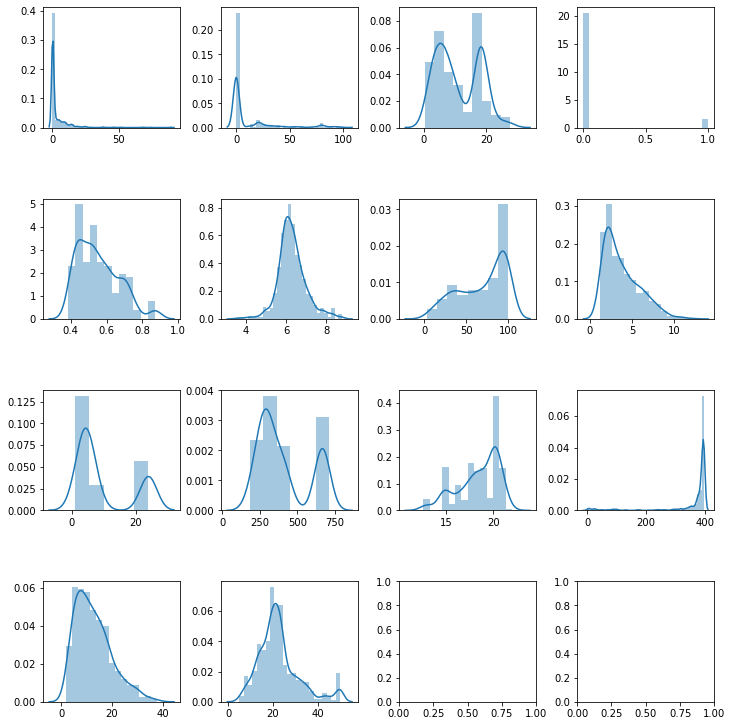

In [26]:
# 2 C Histogram

import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))
axs = axs.flatten()
for idx, data in enumerate(df.items()):
    sns.distplot(data[1:], ax=axs[idx])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

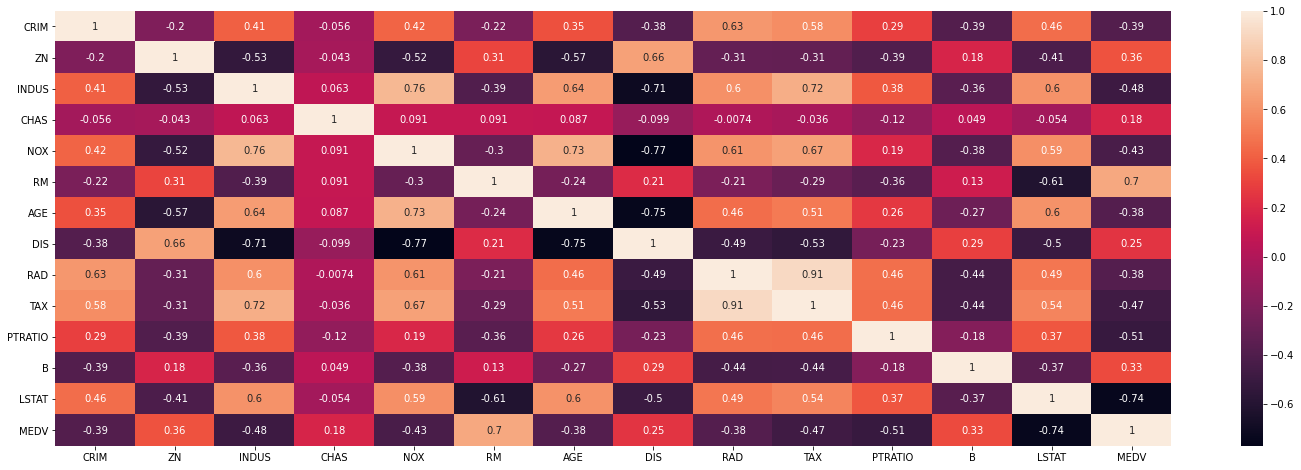

In [29]:
# 2 D Heatmap

plt.figure(figsize=(25, 8))
sns.heatmap(df.corr(),  annot=True)

In [38]:
#3) Split the dataset into training and test.
#4) Check the accuracy on both the training data and the test data, using .score(x, y)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


dftraining = df.drop('MEDV', axis = 1)
data_training, data_test, target_training, target_test = train_test_split(
    dftraining, 
    df["MEDV"], 
    random_state=1)
regressiondata = LinearRegression()
regressiondata.fit(data_training, target_training)

print(regressiondata.score(data_training, target_training))
print(regressiondata.score(data_test, target_test))

0.7168057552393374
0.7789410172622843


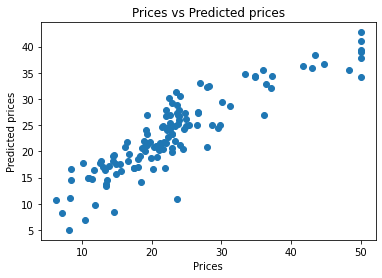

In [39]:
# 5) Plot target prices(x) vs predicted prices(y)

plt.scatter(target_test, regressiondata.predict(data_test))
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()